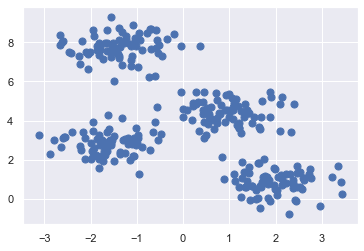

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
#for plot styling
import seaborn as sns;sns.set()
import numpy as np
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)# named the clusters; four clusters from 0 to 3

In [14]:
y_kmeans

array([0, 1, 2, 1, 0, 0, 3, 2, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 3, 3, 0, 0,
       2, 3, 3, 2, 0, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 2, 3, 2, 2,
       3, 3, 1, 3, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3,
       1, 0, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       3, 3, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3,
       3, 0, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 3, 1, 3, 0, 2, 1, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 2, 3, 1,
       0, 0, 2, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 0, 0, 2,
       1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 2, 0, 3, 2, 0, 3, 1, 3, 0, 2,
       0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 0, 0, 1, 2, 2, 3, 0,
       1, 3, 2, 1, 2, 0, 0, 3, 3, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 3, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3])

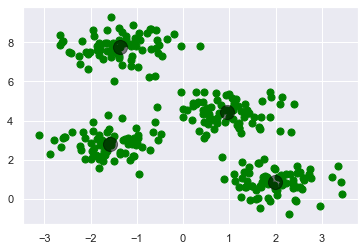

In [31]:
#assign labels based on closest center
#implementation of kmeans
from sklearn.metrics import pairwise_distances_argmin #calculates distances between two points
def find_clusters(X,n_clusters,rseed=2):
    #randomly choose clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    while True:
        #2a Assign labels based on closest center
        labels=pairwise_distances_argmin(X,centers)
        #2b find the new center from the mean of the points
        new_centers=np.array([X[labels==i].mean(0) for i in range (n_clusters)])
        #2c check for convergence
        if np.all((centers==new_centers)):
            break;
        centers=new_centers
    return centers,labels
centers,labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c='green',s=50,cmap='virids')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=.5)

